# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
# !python -m pip install -r requirements.txt

## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

In [4]:
# !pip install -U ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
# Define transforms
transformed = transforms.ToTensor()

# transformations = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,)),  # Example normalization; adjust mean and std as needed
#     Lambda(lambda x: x.view(-1))  # Flatten the image from [1, 28, 28] to [784]
# ])

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root ="data", train = True, download = True, transform = transformed )
train_loader =DataLoader(train_data, batch_size = 100, shuffle = True)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root ="data", train = False, download = True, transform = transformed)
test_loader = DataLoader(train_data, batch_size = 100, shuffle = True)



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**I did transformations for effectively training of my models as well as enabling efficient processing**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

3


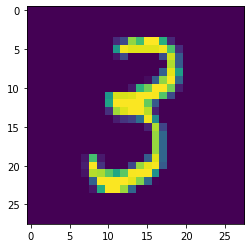

1


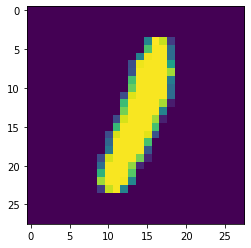

7


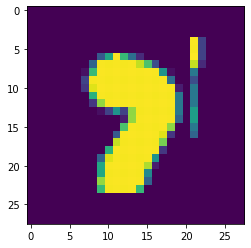

3


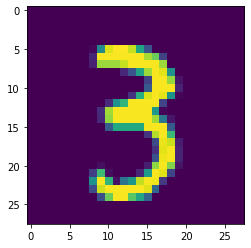

2


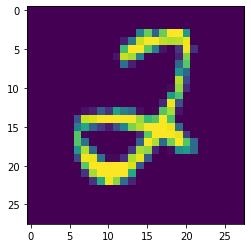

In [7]:
# Explore data
show5(train_loader)

In [8]:
print(f'Number of train data:(len({train_data})')
print(f'Number of test data: (len({test_data})')

Number of train data:(len(Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor())
Number of test data: (len(Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor())


In [9]:


# Print the shape of training data
train_features, train_labels = next(iter(train_loader))
print("Shape of train features:", train_features.shape)
print("Shape of train labels:", train_labels.shape)

# Print the shape of test data
test_features, test_labels = next(iter(test_loader))
print("Shape of test features:", test_features.shape)
print("Shape of test labels:", test_labels.shape)


Shape of train features: torch.Size([100, 1, 28, 28])
Shape of train labels: torch.Size([100])
Shape of test features: torch.Size([100, 1, 28, 28])
Shape of test labels: torch.Size([100])


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [10]:
## YOUR CODE HERE ##

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x, return_probabilities=False):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        if return_probabilities:
            probabilities = F.softmax(logits, dim=1)  # Apply softmax along the second dimension
            return probabilities
        return logits

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
## YOUR CODE HERE ##
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NeuralNetwork()  # Instantiate the model
# Move the model to the chosen device
model.to(device)

# Loss function
loss_function = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
## YOUR CODE HERE ##
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_epochs = 10

# Establish lists for our history of loss and accuracy
train_loss_ = []
val_loss_ = []
train_accuracy_ = []
val_accuracy_ = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0
    train_correct = 0
    total_train = 0

    for i, data in enumerate(train_loader):
        inputs, labels = data[0].to(device), data[1].to(device)  # Move data to the device

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Compute the model output
        loss = loss_function(outputs, labels)  # Calculate loss
        loss.backward()  # Backpropagate the error
        optimizer.step()  # Update weights

        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        total_train += labels.size(0)

    # Output training stats
    train_accuracy = train_correct / total_train
    train_loss_.append(train_loss / len(train_loader))

    print(f'Epoch {epoch + 1}, Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}')

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the device
            outputs = model(inputs)
            loss = loss_function(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()
            total_val += labels.size(0)

    # Output validation stats
    val_accuracy = val_correct / total_val
    val_loss_.append(val_loss / len(test_loader))

    print(f'Epoch {epoch + 1}, Val Loss: {val_loss / len(test_loader):.4f}, Val Accuracy: {val_accuracy:.4f}')


Epoch 1, Train Loss: 0.2501, Train Accuracy: 0.9278
Epoch 1, Val Loss: 0.0952, Val Accuracy: 0.9719
Epoch 2, Train Loss: 0.0904, Train Accuracy: 0.9725
Epoch 2, Val Loss: 0.0572, Val Accuracy: 0.9828
Epoch 3, Train Loss: 0.0605, Train Accuracy: 0.9813
Epoch 3, Val Loss: 0.0386, Val Accuracy: 0.9887
Epoch 4, Train Loss: 0.0435, Train Accuracy: 0.9857
Epoch 4, Val Loss: 0.0260, Val Accuracy: 0.9919
Epoch 5, Train Loss: 0.0333, Train Accuracy: 0.9890
Epoch 5, Val Loss: 0.0224, Val Accuracy: 0.9931
Epoch 6, Train Loss: 0.0267, Train Accuracy: 0.9915
Epoch 6, Val Loss: 0.0226, Val Accuracy: 0.9926
Epoch 7, Train Loss: 0.0215, Train Accuracy: 0.9925
Epoch 7, Val Loss: 0.0106, Val Accuracy: 0.9964
Epoch 8, Train Loss: 0.0203, Train Accuracy: 0.9935
Epoch 8, Val Loss: 0.0159, Val Accuracy: 0.9946
Epoch 9, Train Loss: 0.0148, Train Accuracy: 0.9951
Epoch 9, Val Loss: 0.0139, Val Accuracy: 0.9956
Epoch 10, Train Loss: 0.0162, Train Accuracy: 0.9946
Epoch 10, Val Loss: 0.0095, Val Accuracy: 0.996

Plot the training loss (and validation loss/accuracy, if recorded).

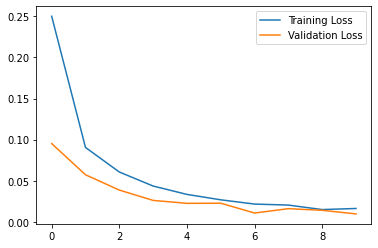

In [13]:
## YOUR CODE HERE ##
# Plot the training and validation loss history
plt.plot(train_loss_, label="Training Loss")
plt.plot(val_loss_, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [14]:
## YOUR CODE HERE ##

# Set the model to evaluation mode
model.eval()

# Initialize the variables to track correct predictions and total predictions
correct = 0
total = 0

# Disable gradient computation since we're in testing mode
with torch.no_grad():
    for inputs, labels in test_loader:
        # Move data to the appropriate device (same as model)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Compute model output
        outputs = model(inputs)

        # Get the predicted class with the highest score
        _, predicted = torch.max(outputs.data, 1)

        # Total number of labels
        total += labels.size(0)

        # Total correct predictions
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

# Additional logic based on the performance
if accuracy > 90:
    print("Great work! Try pushing further for even better accuracy.")
else:
    print("Accuracy is under 90%. Consider revisiting your model architecture, loss function, and optimizer.")


Accuracy of the model on the test images: 99.67%
Great work! Try pushing further for even better accuracy.


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [15]:
## YOUR CODE HERE ##

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
        self.dropout=nn.Dropout(0.2)

    def forward(self, x, return_probabilities=False):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        if return_probabilities:
            probabilities = F.softmax(logits, dim=1)  # Apply softmax along the second dimension
            return probabilities
        return logits

In [16]:
# Initialize the model
model2 = NeuralNetwork()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)



# Loss function
loss_function = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:

num_epochs = 10

# Establish lists for our history of loss and accuracy
train_loss_ = []
val_loss_ = []
train_accuracy_ = []
val_accuracy_ = []

for epoch in range(num_epochs):
    model2.train()  # Set the model to training mode
    train_loss = 0.0
    train_correct = 0
    total_train = 0

    for i, data in enumerate(train_loader):
        inputs, labels = data[0].to(device), data[1].to(device)  # Move data to the device

        optimizer.zero_grad()  # Zero the gradients
        outputs = model2(inputs)  # Compute the model output
        loss = loss_function(outputs, labels)  # Calculate loss
        loss.backward()  # Backpropagate the error
        optimizer.step()  # Update weights

        _, preds = torch.max(outputs, 1)
        train_correct += (preds == labels).sum().item()
        train_loss += loss.item()
        total_train += labels.size(0)

    # Output training stats
    train_accuracy = train_correct / total_train
    train_loss_.append(train_loss / len(train_loader))

    print(f'Epoch {epoch + 1}, Train Loss: {train_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}')

    # Validation loop
    model2.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the device
            outputs = model2(inputs)
            loss = loss_function(outputs, labels)

            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_loss += loss.item()
            total_val += labels.size(0)

    # Output validation stats
    val_accuracy = val_correct / total_val
    val_loss_.append(val_loss / len(test_loader))

    print(f'Epoch {epoch + 1}, Val Loss: {val_loss / len(test_loader):.4f}, Val Accuracy: {val_accuracy:.4f}')


Epoch 1, Train Loss: 2.3027, Train Accuracy: 0.0953
Epoch 1, Val Loss: 2.3027, Val Accuracy: 0.0953
Epoch 2, Train Loss: 2.3027, Train Accuracy: 0.0953
Epoch 2, Val Loss: 2.3027, Val Accuracy: 0.0953
Epoch 3, Train Loss: 2.3027, Train Accuracy: 0.0953
Epoch 3, Val Loss: 2.3027, Val Accuracy: 0.0953
Epoch 4, Train Loss: 2.3027, Train Accuracy: 0.0953
Epoch 4, Val Loss: 2.3027, Val Accuracy: 0.0953
Epoch 5, Train Loss: 2.3027, Train Accuracy: 0.0953
Epoch 5, Val Loss: 2.3027, Val Accuracy: 0.0953
Epoch 6, Train Loss: 2.3027, Train Accuracy: 0.0953
Epoch 6, Val Loss: 2.3027, Val Accuracy: 0.0953
Epoch 7, Train Loss: 2.3027, Train Accuracy: 0.0953
Epoch 7, Val Loss: 2.3027, Val Accuracy: 0.0953


In [ ]:
# Set the model to evaluation mode
model2.eval()

# Initialize the variables to track correct predictions and total predictions
correct = 0
total = 0

# Disable gradient computation since we're in testing mode
with torch.no_grad():
    for inputs, labels in test_loader:
        # Move data to the appropriate device (same as model)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Compute model output
        outputs = model2(inputs)

        # Get the predicted class with the highest score
        _, predicted = torch.max(outputs.data, 1)

        # Total number of labels
        total += labels.size(0)

        # Total correct predictions
        correct += (predicted == labels).sum().item()

# Calculate the accuracy
accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

# Additional logic based on the performance
if accuracy > 90:
    print("Great work! Try pushing further for even better accuracy.")
else:
    print("Accuracy is under 90%. Consider revisiting your model architecture, loss function, and optimizer.")


## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##

# torch.save(model.state_dict(), 'model.pth')
# torch.save(model2.state_dict(), 'model2.pth')


## References

https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST

https://github.com/nakasho5/Deep-Learning-Nanodegree/blob/main/Project1_Developing%20a%20Handwritten%20Digits%20Classifier%20with%20PyTorch/MNIST_Handwritten_Digits-STARTER_MAC.ipynb

https://github.com/supersjgk/Handwritten-Digit-Classification-PyTorch/blob/main/mnist.py